<h3>Introduction:</h3>

<p> The creative project is about conducting a real-world machine learning project on your own, with everything that is involved. Unlike in the programming projects 1-5, where we gave you all the scaffolding and you just filled in the blanks, you now start from scratch. The past programming projects provide templates for how to do this (and you can reuse part of your code if you wish), and the lectures provide some of the methods you can use. So, this creative project brings realism to how you will use machine learning in the real world.  </p>

The task you will work on is classifying texts to human emotions. Through words, humans express feelings, articulate thoughts, and communicate our deepest needs and desires. Language helps us interpret the nuances of joy, sadness, anger, and love, allowing us to connect with others on a deeper level. Are you able to train an ML model that recognizes the human emotions expressed in a piece of text? <b>Please read the project description PDF file carefully and follow the instructions there. Also make sure you write your code and answers to all the questions in this Jupyter Notebook </b> </p>
<p>


<h2>Part 0: Basics</h2><p>

<h3>0.1 Import:</h3><p>
Please import necessary packages to use. Note that learning and using packages are recommended but not required for this project. Some official tutorial for suggested packacges includes:
    
https://scikit-learn.org/stable/tutorial/basic/tutorial.html
    
https://pytorch.org/tutorials/
    
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
<p>

In [1]:
import os
import pandas as pd
import numpy as np
import torch

<h3>0.2 Accuracy and Mean Squared Error:</h3><p>
To measure your performance in the Kaggle Competition, we are using accuracy. As a recap, accuracy is the percent of labels you predict correctly. To measure this, you can use library functions from sklearn. A simple example is shown below. 
<p>

In [3]:
from sklearn.metrics import accuracy_score
y_pred = [3, 2, 1, 0, 1, 2, 3]
y_true = [0, 1, 2, 3, 1, 2, 3]
accuracy_score(y_true, y_pred)

0.42857142857142855

<h2>Part 1: Basic</h2><p>
Note that your code should be commented well and in part 1.4 you can refer to your comments.

<h3>1.1 Load and preprocess the dataset:</h3><p>
We provide how to load the data on Kaggle's Notebook.
<p>

In [4]:
# Loading training data
train = pd.read_csv("train.csv")
train_text = train["text"]
train_label = train["label"]

# Loading testing data
test = pd.read_csv("test.csv")
test_id = test["id"]
test_text = test["text"]

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Splitting data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(train_text, train_label, test_size = 0.30, random_state = 42)

# Generating a bag-of-words from the training set
vectorizer = CountVectorizer(stop_words = "english", lowercase = True)
vector_X = vectorizer.fit_transform(X_train)

# Generating bag-of-words for the testing set ans test_text
test_vector_X = vectorizer.transform(X_test)
test_data = vectorizer.transform(test_text)

<h3>1.2 Use At Least Two Training Algorithms from class:</h3><p>
You need to use at least two training algorithms from class. You can use your code from previous projects or any packages you imported in part 0.1.

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Implementing a Naive-Bayes algorithm to fit the dataset
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(vector_X, y_train)

# Evaluating the Naive-Bayes model accuracy against the testing set
y_pred = naive_bayes_model.predict(test_vector_X)
accuracy = accuracy_score(y_test, y_pred)
print("Naive-Bayes model accuracy: " + str(accuracy))

# Implementing a linear SVM algorithm to fit the dataset
svm_model = SVC(kernel = 'linear')
svm_model.fit(vector_X, y_train)

# Evaluating the linear SVM model accuracy against the testing set
y_pred = svm_model.predict(test_vector_X)
accuracy = accuracy_score(y_test, y_pred)
print("Linear SVM model accuracy: " + str(accuracy))

Naive-Bayes model accuracy: 0.543
Linear SVM model accuracy: 0.7083333333333334


<h3>1.3 Training, Validation and Model Selection:</h3><p>
You need to split your data to a training set and validation set or performing a cross-validation for model selection.

In [9]:
from sklearn.model_selection import GridSearchCV

# Performinng GridSearch (3-fold Cross Validation) to choose optimal hyperparameters and kernel
parameters= {
    'C': [0.4, 0.5, 0.6, 0.75, 1],               
    'kernel': ['linear', 'rbf', 'sigmoid'],   
    'gamma': [1, 0.1, 0.01, 0.001],   
}

svm_model = GridSearchCV(
    estimator = SVC(),
    param_grid = parameters,
    cv = 3,                   
    verbose = 2         
)

# Implementing SVM algorithm with optimal parameters through GridSearch to fit the dataset
svm_model.fit(vector_X, y_train)

# Evaluating the GridSearch SVM model accuracy against the testing set
y_pred = svm_model.predict(test_vector_X)
accuracy = accuracy_score(y_test, y_pred)
print("GridSearch SVM model accuracy: " + str(accuracy))

Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


[CV] END ......................C=0.4, gamma=1, kernel=linear; total time=   4.5s
[CV] END ......................C=0.4, gamma=1, kernel=linear; total time=   4.5s
[CV] END ......................C=0.4, gamma=1, kernel=linear; total time=   4.2s
[CV] END .........................C=0.4, gamma=1, kernel=rbf; total time=  10.5s
[CV] END .........................C=0.4, gamma=1, kernel=rbf; total time=  10.4s
[CV] END .........................C=0.4, gamma=1, kernel=rbf; total time=  10.4s
[CV] END .....................C=0.4, gamma=1, kernel=sigmoid; total time=   2.8s
[CV] END .....................C=0.4, gamma=1, kernel=sigmoid; total time=   2.8s
[CV] END .....................C=0.4, gamma=1, kernel=sigmoid; total time=   2.9s
[CV] END ....................C=0.4, gamma=0.1, kernel=linear; total time=   4.5s
[CV] END ....................C=0.4, gamma=0.1, kernel=linear; total time=   4.3s
[CV] END ....................C=0.4, gamma=0.1, kernel=linear; total time=   4.2s
[CV] END ...................

<h3>1.4 Explanation in Words:</h3><p>
    You need to answer the following questions in the markdown cell after this cell:

1.4.1 How did you formulate the learning problem?

  We formulated the learning problem as a text classification problem, where the input text(sentence) is classified among
  28 possible labels(emotions). The goal of the learning problem is to generate a text classification model that learns a
  hypothesis h that minimizes the classification error err(h).

1.4.2 Which two learning methods from class did you choose and why did you made the choices?

  We chose a multinomial Naive Bayes Classifier, and SVM(with Cross-Validation for optimal choice hyperparameters) as the 
  learning model. We chose a multinomial Naive Bayes as it is the simplest text classification model, which would have allowed
  us to gauge at the performance of a simple model and establish whether the choice of bag-of-words method was effective in classifying
  the input sentences accurately. Then we used a SVM model as the SVM model is highly effective at text classification, when combined with
  k-fold cross validation to tune the hyperparameters as we implemented using the GridSearchSV() which performs a 3-fold cross validation
  over kernel-choice, C, and gamma.

1.4.3 How did you do the model selection?

  We chose the model based on their performance, i.e. by observing and comparing the prediction error on the testing set, after training
  each model on the training set. In the above analysis, we chose SVM(with Cross Validation) i.e GridSearchCV to be the best model so far
  as the accuracy score for the model was higher than the accuracy score of the other algorithms we implemented.

1.4.4 Does the test performance reach the first baseline "Tiny Piney"? (Please include a screenshot of Kaggle Submission)

  Test performance for SVM(with CV) model:
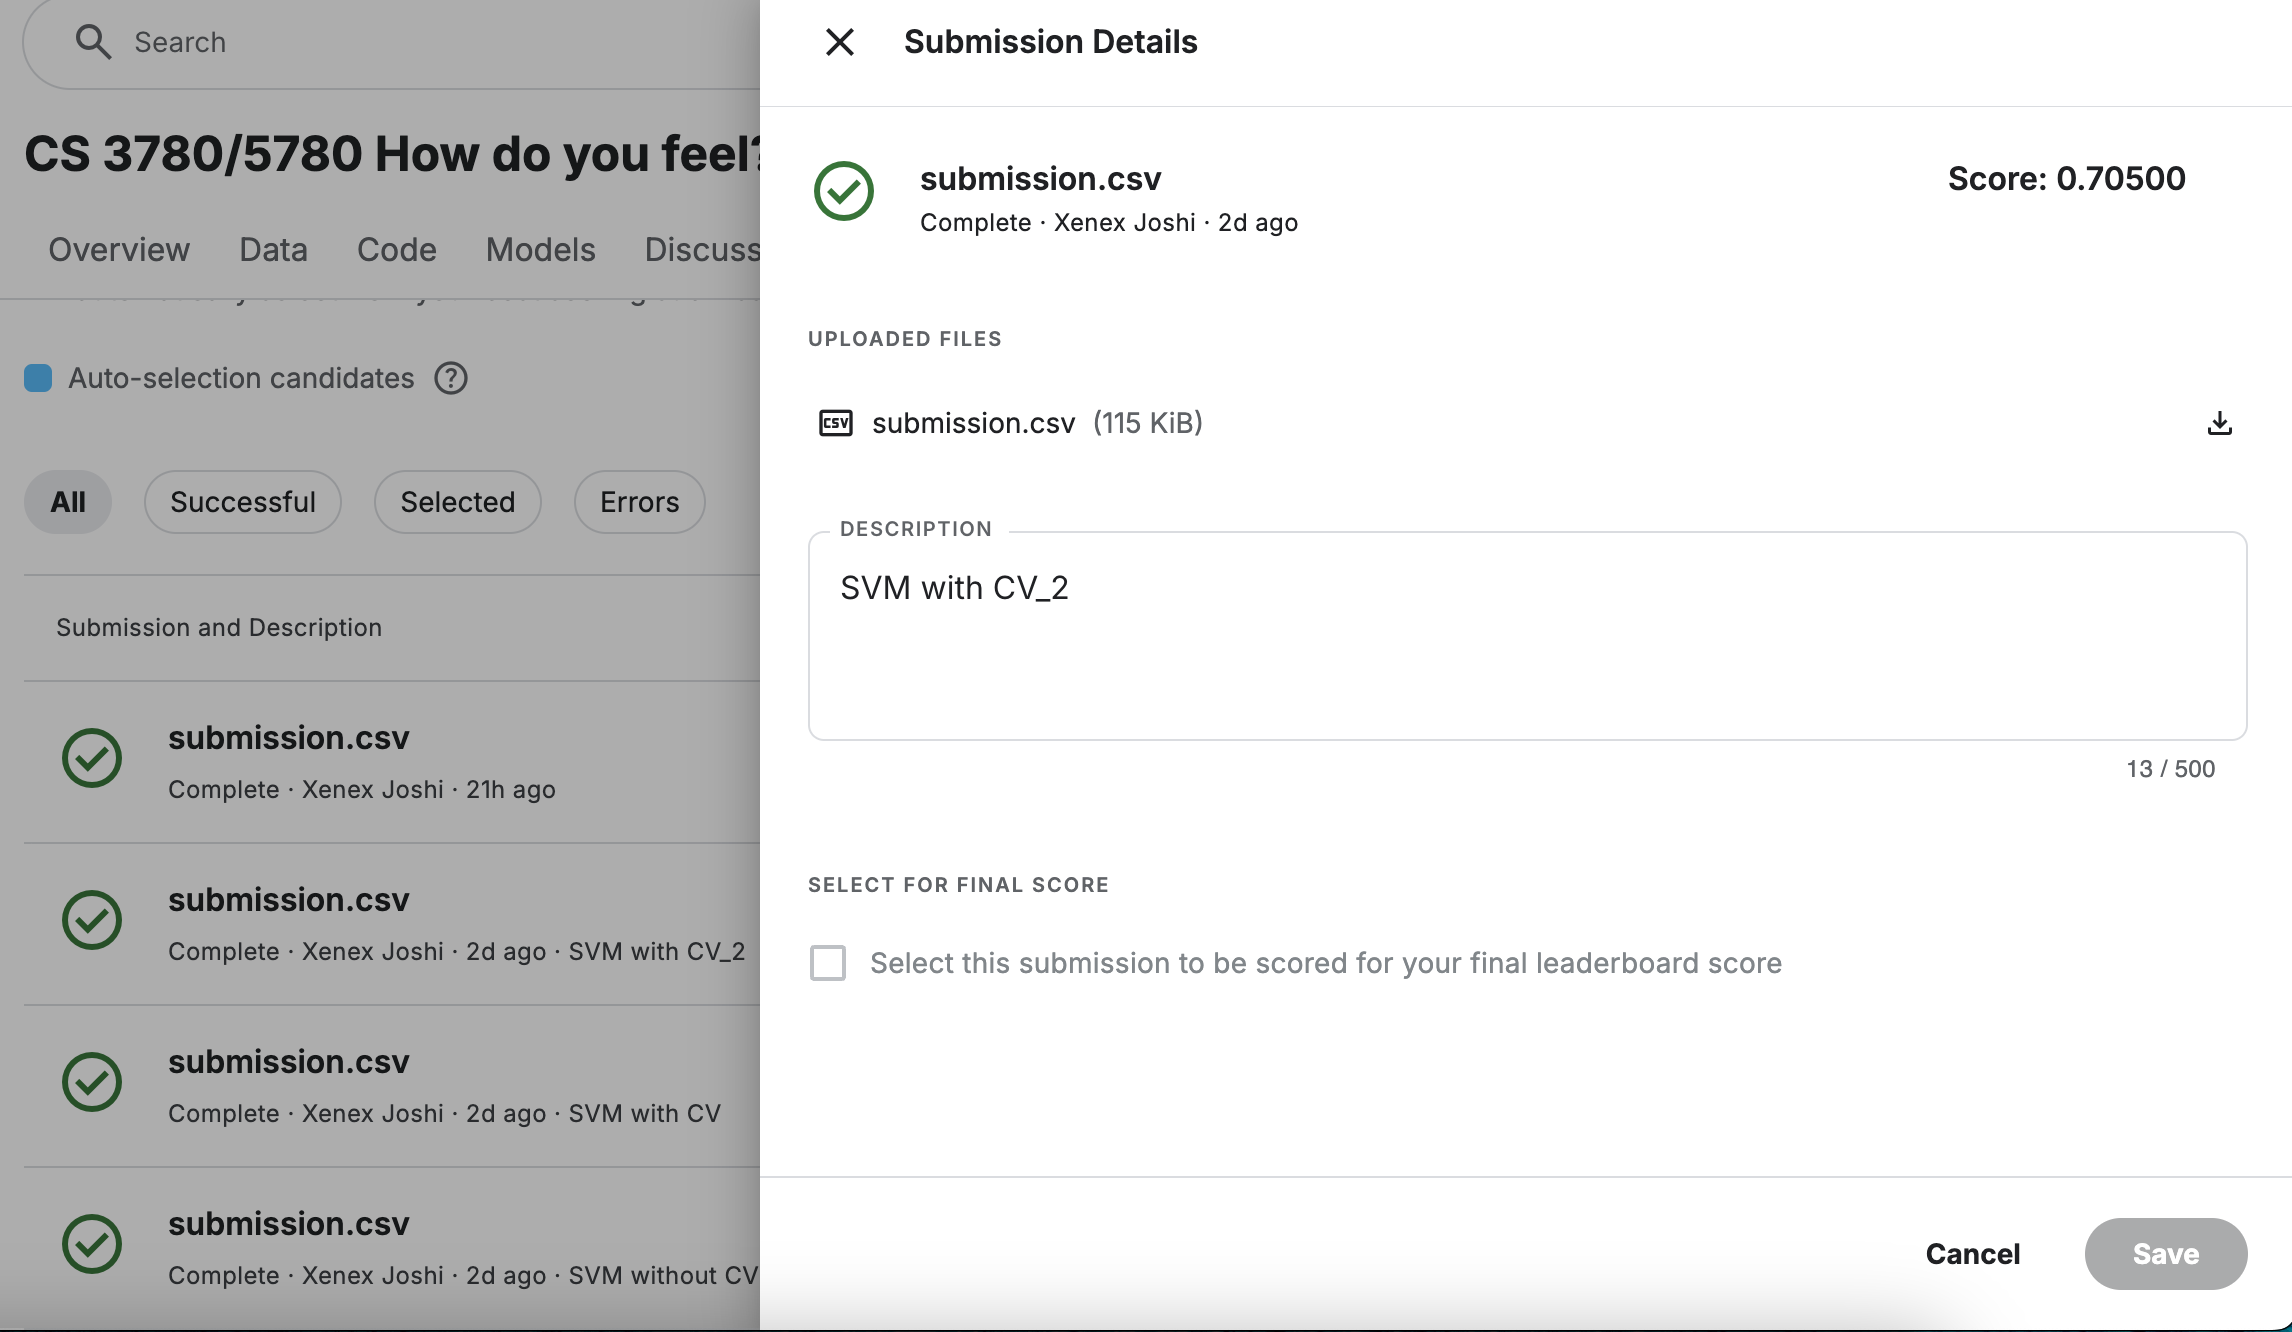

<h2>Part 2: Be creative!</h2><p>

<h3>2.1 Open-ended Code:</h3><p>
You may follow the steps in part 1 again but making innovative changes like using new training algorithms, etc. Make sure you explain everything clearly in part 2.2. Note that beating "Zero Hero" is only a small portion of this part. Any creative ideas will receive most points as long as they are reasonable and clearly explained.

In [11]:
%pip install transformer[torch] accelerate

from torch.utils.data import Dataset
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
transformer_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 28)


class EmotionDataset(Dataset):
   def __init__(self, data, tokenizer, labels):
       self.data = tokenizer(data.tolist(), truncation = True, padding = True, max_length = 64)
       self.labels = labels.tolist()


   def __len__(self):
       return len(self.labels)
  
   def __getitem__(self, index):
       items = {}
       for key, val in self.data.items():
           items[key] = torch.tensor(val[index])
       items['labels'] = torch.tensor(self.labels[index])
       return items


train_dataset = EmotionDataset(X_train, tokenizer ,y_train)
test_dataset = EmotionDataset(X_test, tokenizer ,y_test)


training_param = TrainingArguments(output_dir = './output',
                                  num_train_epochs = 5,
                                  per_device_train_batch_size = 16,
                                  per_device_eval_batch_size = 64,
                                  warmup_steps = 500,
                                  weight_decay = 0.05,
                                  logging_dir = './logs',
                                  logging_steps = 10
                                  )


trainer = Trainer(model = transformer_model,
                 args = training_param,
                 train_dataset = train_dataset)
trainer.train()

y_pred = trainer.predict(test_dataset)
y_pred = y_pred.predictions.argmax(-1)
accuracy = accuracy_score(y_test, y_pred)
print("Bert transformer accuracy: " + str(accuracy))


ERROR: Could not find a version that satisfies the requirement transformer[torch] (from versions: none)
ERROR: No matching distribution found for transformer[torch]


Note: you may need to restart the kernel to use updated packages.


c:\Users\nzhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
  0%|          | 10/2190 [00:25<1:31:12,  2.51s/it]

{'loss': 3.3445, 'grad_norm': 6.634163856506348, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.02}


  1%|          | 20/2190 [00:54<1:48:32,  3.00s/it]

{'loss': 3.3389, 'grad_norm': 8.281437873840332, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.05}


  1%|▏         | 30/2190 [01:22<1:33:58,  2.61s/it]

{'loss': 3.3015, 'grad_norm': 6.608188629150391, 'learning_rate': 3e-06, 'epoch': 0.07}


  2%|▏         | 40/2190 [01:50<1:36:31,  2.69s/it]

{'loss': 3.2654, 'grad_norm': 6.758865833282471, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.09}


  2%|▏         | 50/2190 [02:19<1:38:59,  2.78s/it]

{'loss': 3.2017, 'grad_norm': 9.593744277954102, 'learning_rate': 5e-06, 'epoch': 0.11}


  3%|▎         | 60/2190 [02:49<1:41:19,  2.85s/it]

{'loss': 3.1238, 'grad_norm': 8.806114196777344, 'learning_rate': 6e-06, 'epoch': 0.14}


  3%|▎         | 70/2190 [03:19<1:42:24,  2.90s/it]

{'loss': 3.0965, 'grad_norm': 8.410340309143066, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.16}


  4%|▎         | 80/2190 [03:49<1:40:29,  2.86s/it]

{'loss': 2.9679, 'grad_norm': 9.232427597045898, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.18}


  4%|▍         | 90/2190 [04:18<1:38:24,  2.81s/it]

{'loss': 2.845, 'grad_norm': 15.696187019348145, 'learning_rate': 9e-06, 'epoch': 0.21}


  5%|▍         | 100/2190 [04:48<1:39:21,  2.85s/it]

{'loss': 2.737, 'grad_norm': 8.913854598999023, 'learning_rate': 1e-05, 'epoch': 0.23}


  5%|▌         | 110/2190 [05:22<1:48:11,  3.12s/it]

{'loss': 2.6704, 'grad_norm': 9.232726097106934, 'learning_rate': 1.1000000000000001e-05, 'epoch': 0.25}


  5%|▌         | 120/2190 [05:53<1:43:05,  2.99s/it]

{'loss': 2.4898, 'grad_norm': 6.544795513153076, 'learning_rate': 1.2e-05, 'epoch': 0.27}


  6%|▌         | 130/2190 [06:24<1:44:05,  3.03s/it]

{'loss': 2.4484, 'grad_norm': 7.556593894958496, 'learning_rate': 1.3000000000000001e-05, 'epoch': 0.3}


  6%|▋         | 140/2190 [06:56<1:44:15,  3.05s/it]

{'loss': 2.3405, 'grad_norm': 9.274107933044434, 'learning_rate': 1.4000000000000001e-05, 'epoch': 0.32}


  7%|▋         | 150/2190 [07:28<1:51:02,  3.27s/it]

{'loss': 2.3447, 'grad_norm': 7.5112481117248535, 'learning_rate': 1.5e-05, 'epoch': 0.34}


  7%|▋         | 160/2190 [08:09<1:59:57,  3.55s/it]

{'loss': 2.1936, 'grad_norm': 9.52254581451416, 'learning_rate': 1.6000000000000003e-05, 'epoch': 0.37}


  8%|▊         | 170/2190 [08:43<1:56:22,  3.46s/it]

{'loss': 2.1853, 'grad_norm': 6.716801166534424, 'learning_rate': 1.7000000000000003e-05, 'epoch': 0.39}


  8%|▊         | 180/2190 [09:16<1:45:01,  3.13s/it]

{'loss': 2.1222, 'grad_norm': 7.100554943084717, 'learning_rate': 1.8e-05, 'epoch': 0.41}


  9%|▊         | 190/2190 [09:51<1:57:16,  3.52s/it]

{'loss': 1.9669, 'grad_norm': 5.633819103240967, 'learning_rate': 1.9e-05, 'epoch': 0.43}


  9%|▉         | 200/2190 [10:26<1:56:34,  3.51s/it]

{'loss': 1.9835, 'grad_norm': 6.119176387786865, 'learning_rate': 2e-05, 'epoch': 0.46}


 10%|▉         | 210/2190 [11:02<1:57:52,  3.57s/it]

{'loss': 1.8311, 'grad_norm': 7.760915756225586, 'learning_rate': 2.1e-05, 'epoch': 0.48}


 10%|█         | 220/2190 [11:39<2:02:33,  3.73s/it]

{'loss': 1.8395, 'grad_norm': 7.2743659019470215, 'learning_rate': 2.2000000000000003e-05, 'epoch': 0.5}


 11%|█         | 230/2190 [12:17<2:04:42,  3.82s/it]

{'loss': 1.8272, 'grad_norm': 5.438333988189697, 'learning_rate': 2.3000000000000003e-05, 'epoch': 0.53}


 11%|█         | 240/2190 [12:55<2:04:03,  3.82s/it]

{'loss': 1.6879, 'grad_norm': 11.014506340026855, 'learning_rate': 2.4e-05, 'epoch': 0.55}


 11%|█▏        | 250/2190 [13:33<2:03:32,  3.82s/it]

{'loss': 1.6868, 'grad_norm': 7.5759735107421875, 'learning_rate': 2.5e-05, 'epoch': 0.57}


 12%|█▏        | 260/2190 [14:12<2:03:38,  3.84s/it]

{'loss': 1.5864, 'grad_norm': 5.9794230461120605, 'learning_rate': 2.6000000000000002e-05, 'epoch': 0.59}


 12%|█▏        | 270/2190 [14:50<2:03:43,  3.87s/it]

{'loss': 1.4826, 'grad_norm': 13.364853858947754, 'learning_rate': 2.7000000000000002e-05, 'epoch': 0.62}


 13%|█▎        | 280/2190 [15:29<2:01:30,  3.82s/it]

{'loss': 1.5856, 'grad_norm': 5.842952728271484, 'learning_rate': 2.8000000000000003e-05, 'epoch': 0.64}


 13%|█▎        | 290/2190 [16:07<2:01:11,  3.83s/it]

{'loss': 1.5242, 'grad_norm': 9.206738471984863, 'learning_rate': 2.9e-05, 'epoch': 0.66}


 14%|█▎        | 300/2190 [16:45<2:01:07,  3.85s/it]

{'loss': 1.6717, 'grad_norm': 5.818850517272949, 'learning_rate': 3e-05, 'epoch': 0.68}


 14%|█▍        | 310/2190 [17:24<2:00:02,  3.83s/it]

{'loss': 1.5099, 'grad_norm': 11.523473739624023, 'learning_rate': 3.1e-05, 'epoch': 0.71}


 15%|█▍        | 320/2190 [18:02<1:59:18,  3.83s/it]

{'loss': 1.772, 'grad_norm': 11.011439323425293, 'learning_rate': 3.2000000000000005e-05, 'epoch': 0.73}


 15%|█▌        | 330/2190 [18:41<1:58:55,  3.84s/it]

{'loss': 1.5937, 'grad_norm': 5.346635341644287, 'learning_rate': 3.3e-05, 'epoch': 0.75}


 16%|█▌        | 340/2190 [19:19<1:57:24,  3.81s/it]

{'loss': 1.2819, 'grad_norm': 9.095487594604492, 'learning_rate': 3.4000000000000007e-05, 'epoch': 0.78}


 16%|█▌        | 350/2190 [19:58<1:57:46,  3.84s/it]

{'loss': 1.4623, 'grad_norm': 6.170387268066406, 'learning_rate': 3.5e-05, 'epoch': 0.8}


 16%|█▋        | 360/2190 [20:36<1:57:23,  3.85s/it]

{'loss': 1.3578, 'grad_norm': 19.250478744506836, 'learning_rate': 3.6e-05, 'epoch': 0.82}


 17%|█▋        | 370/2190 [21:15<1:56:53,  3.85s/it]

{'loss': 1.2269, 'grad_norm': 9.502862930297852, 'learning_rate': 3.7e-05, 'epoch': 0.84}


 17%|█▋        | 380/2190 [21:53<1:54:58,  3.81s/it]

{'loss': 1.2258, 'grad_norm': 19.184478759765625, 'learning_rate': 3.8e-05, 'epoch': 0.87}


 18%|█▊        | 390/2190 [22:31<1:54:27,  3.82s/it]

{'loss': 1.1934, 'grad_norm': 15.618135452270508, 'learning_rate': 3.9000000000000006e-05, 'epoch': 0.89}


 18%|█▊        | 400/2190 [23:08<1:49:17,  3.66s/it]

{'loss': 1.187, 'grad_norm': 10.545511245727539, 'learning_rate': 4e-05, 'epoch': 0.91}


 19%|█▊        | 410/2190 [23:44<1:44:55,  3.54s/it]

{'loss': 1.1214, 'grad_norm': 8.149923324584961, 'learning_rate': 4.1e-05, 'epoch': 0.94}


 19%|█▉        | 420/2190 [24:19<1:43:47,  3.52s/it]

{'loss': 1.207, 'grad_norm': 17.212080001831055, 'learning_rate': 4.2e-05, 'epoch': 0.96}


 20%|█▉        | 430/2190 [24:55<1:44:44,  3.57s/it]

{'loss': 1.0774, 'grad_norm': 5.959299564361572, 'learning_rate': 4.3e-05, 'epoch': 0.98}


 20%|██        | 440/2190 [25:29<1:37:32,  3.34s/it]

{'loss': 0.9421, 'grad_norm': 9.777104377746582, 'learning_rate': 4.4000000000000006e-05, 'epoch': 1.0}


 21%|██        | 450/2190 [26:03<1:35:02,  3.28s/it]

{'loss': 0.9949, 'grad_norm': 11.449511528015137, 'learning_rate': 4.5e-05, 'epoch': 1.03}


 21%|██        | 460/2190 [26:36<1:29:54,  3.12s/it]

{'loss': 0.8036, 'grad_norm': 7.745826721191406, 'learning_rate': 4.600000000000001e-05, 'epoch': 1.05}


 21%|██▏       | 470/2190 [27:09<1:29:56,  3.14s/it]

{'loss': 1.0385, 'grad_norm': 7.046844482421875, 'learning_rate': 4.7e-05, 'epoch': 1.07}


 22%|██▏       | 480/2190 [27:42<1:29:26,  3.14s/it]

{'loss': 0.9985, 'grad_norm': 11.529535293579102, 'learning_rate': 4.8e-05, 'epoch': 1.1}


 22%|██▏       | 490/2190 [28:15<1:29:28,  3.16s/it]

{'loss': 1.0928, 'grad_norm': 25.391569137573242, 'learning_rate': 4.9e-05, 'epoch': 1.12}


 23%|██▎       | 500/2190 [28:48<1:27:55,  3.12s/it]

{'loss': 0.9678, 'grad_norm': 13.239424705505371, 'learning_rate': 5e-05, 'epoch': 1.14}


 23%|██▎       | 510/2190 [29:23<1:32:54,  3.32s/it]

{'loss': 0.7739, 'grad_norm': 5.559863090515137, 'learning_rate': 4.970414201183432e-05, 'epoch': 1.16}


 24%|██▎       | 520/2190 [29:59<1:39:55,  3.59s/it]

{'loss': 0.9534, 'grad_norm': 4.398015022277832, 'learning_rate': 4.9408284023668644e-05, 'epoch': 1.19}


 24%|██▍       | 530/2190 [30:35<1:37:08,  3.51s/it]

{'loss': 0.7883, 'grad_norm': 15.698185920715332, 'learning_rate': 4.9112426035502965e-05, 'epoch': 1.21}


 25%|██▍       | 540/2190 [31:12<1:38:18,  3.57s/it]

{'loss': 1.0105, 'grad_norm': 9.050132751464844, 'learning_rate': 4.881656804733728e-05, 'epoch': 1.23}


 25%|██▌       | 550/2190 [32:04<2:35:23,  5.68s/it]

{'loss': 1.0343, 'grad_norm': 6.652413368225098, 'learning_rate': 4.85207100591716e-05, 'epoch': 1.26}


 26%|██▌       | 560/2190 [32:46<1:47:19,  3.95s/it]

{'loss': 0.7666, 'grad_norm': 14.453807830810547, 'learning_rate': 4.822485207100592e-05, 'epoch': 1.28}


 26%|██▌       | 570/2190 [33:25<1:45:48,  3.92s/it]

{'loss': 0.7133, 'grad_norm': 6.789384365081787, 'learning_rate': 4.792899408284024e-05, 'epoch': 1.3}


 26%|██▋       | 580/2190 [34:04<1:44:37,  3.90s/it]

{'loss': 1.0754, 'grad_norm': 23.184925079345703, 'learning_rate': 4.7633136094674555e-05, 'epoch': 1.32}


 27%|██▋       | 590/2190 [34:43<1:43:22,  3.88s/it]

{'loss': 0.9877, 'grad_norm': 9.158428192138672, 'learning_rate': 4.7337278106508875e-05, 'epoch': 1.35}


 27%|██▋       | 600/2190 [35:19<1:34:45,  3.58s/it]

{'loss': 0.8673, 'grad_norm': 14.378182411193848, 'learning_rate': 4.7041420118343196e-05, 'epoch': 1.37}


 28%|██▊       | 610/2190 [35:55<1:34:32,  3.59s/it]

{'loss': 1.0789, 'grad_norm': 6.567833423614502, 'learning_rate': 4.674556213017752e-05, 'epoch': 1.39}


 28%|██▊       | 620/2190 [36:32<1:43:20,  3.95s/it]

{'loss': 0.9558, 'grad_norm': 7.1128411293029785, 'learning_rate': 4.644970414201184e-05, 'epoch': 1.42}


 29%|██▉       | 630/2190 [37:12<1:43:44,  3.99s/it]

{'loss': 0.7907, 'grad_norm': 13.16209888458252, 'learning_rate': 4.615384615384616e-05, 'epoch': 1.44}


 29%|██▉       | 640/2190 [37:52<1:50:47,  4.29s/it]

{'loss': 0.9443, 'grad_norm': 10.644700050354004, 'learning_rate': 4.585798816568048e-05, 'epoch': 1.46}


 30%|██▉       | 650/2190 [38:45<2:16:34,  5.32s/it]

{'loss': 0.9467, 'grad_norm': 11.95300579071045, 'learning_rate': 4.556213017751479e-05, 'epoch': 1.48}


 30%|███       | 660/2190 [39:48<3:01:10,  7.10s/it]

{'loss': 0.898, 'grad_norm': 10.514983177185059, 'learning_rate': 4.5266272189349114e-05, 'epoch': 1.51}


 31%|███       | 670/2190 [41:06<3:25:22,  8.11s/it]

{'loss': 0.981, 'grad_norm': 5.512526988983154, 'learning_rate': 4.4970414201183434e-05, 'epoch': 1.53}


 31%|███       | 680/2190 [42:14<2:26:29,  5.82s/it]

{'loss': 0.9626, 'grad_norm': 12.231273651123047, 'learning_rate': 4.4674556213017755e-05, 'epoch': 1.55}


 32%|███▏      | 690/2190 [42:59<1:51:14,  4.45s/it]

{'loss': 0.7782, 'grad_norm': 14.714585304260254, 'learning_rate': 4.437869822485207e-05, 'epoch': 1.58}


 32%|███▏      | 700/2190 [43:39<1:37:07,  3.91s/it]

{'loss': 0.8648, 'grad_norm': 17.744213104248047, 'learning_rate': 4.408284023668639e-05, 'epoch': 1.6}


 32%|███▏      | 710/2190 [44:17<1:36:02,  3.89s/it]

{'loss': 1.1302, 'grad_norm': 7.730104446411133, 'learning_rate': 4.378698224852072e-05, 'epoch': 1.62}


 33%|███▎      | 720/2190 [44:55<1:30:31,  3.69s/it]

{'loss': 0.7972, 'grad_norm': 8.604286193847656, 'learning_rate': 4.349112426035503e-05, 'epoch': 1.64}


 33%|███▎      | 730/2190 [45:31<1:26:30,  3.55s/it]

{'loss': 1.0558, 'grad_norm': 7.729647636413574, 'learning_rate': 4.319526627218935e-05, 'epoch': 1.67}


 34%|███▍      | 740/2190 [46:06<1:23:23,  3.45s/it]

{'loss': 0.816, 'grad_norm': 9.770186424255371, 'learning_rate': 4.289940828402367e-05, 'epoch': 1.69}


 34%|███▍      | 750/2190 [46:41<1:21:01,  3.38s/it]

{'loss': 0.705, 'grad_norm': 7.391653537750244, 'learning_rate': 4.260355029585799e-05, 'epoch': 1.71}


 35%|███▍      | 760/2190 [47:15<1:19:31,  3.34s/it]

{'loss': 0.7644, 'grad_norm': 14.24123477935791, 'learning_rate': 4.230769230769231e-05, 'epoch': 1.74}


 35%|███▌      | 770/2190 [47:53<1:30:33,  3.83s/it]

{'loss': 1.0474, 'grad_norm': 8.93184757232666, 'learning_rate': 4.201183431952663e-05, 'epoch': 1.76}


 36%|███▌      | 780/2190 [48:32<1:29:49,  3.82s/it]

{'loss': 0.9073, 'grad_norm': 5.95659065246582, 'learning_rate': 4.171597633136095e-05, 'epoch': 1.78}


 36%|███▌      | 790/2190 [49:06<1:16:26,  3.28s/it]

{'loss': 0.8684, 'grad_norm': 11.494759559631348, 'learning_rate': 4.142011834319527e-05, 'epoch': 1.8}


 37%|███▋      | 800/2190 [49:40<1:14:34,  3.22s/it]

{'loss': 0.6128, 'grad_norm': 9.102614402770996, 'learning_rate': 4.112426035502959e-05, 'epoch': 1.83}


 37%|███▋      | 810/2190 [50:12<1:11:32,  3.11s/it]

{'loss': 0.8431, 'grad_norm': 13.555418968200684, 'learning_rate': 4.0828402366863904e-05, 'epoch': 1.85}


 37%|███▋      | 820/2190 [50:43<1:06:54,  2.93s/it]

{'loss': 0.6699, 'grad_norm': 4.990478992462158, 'learning_rate': 4.053254437869823e-05, 'epoch': 1.87}


 38%|███▊      | 830/2190 [51:14<1:06:46,  2.95s/it]

{'loss': 0.7905, 'grad_norm': 5.108376502990723, 'learning_rate': 4.0236686390532545e-05, 'epoch': 1.89}


 38%|███▊      | 840/2190 [51:44<1:04:17,  2.86s/it]

{'loss': 0.5984, 'grad_norm': 3.58889102935791, 'learning_rate': 3.9940828402366866e-05, 'epoch': 1.92}


 39%|███▉      | 850/2190 [52:15<1:05:35,  2.94s/it]

{'loss': 0.9443, 'grad_norm': 2.232215642929077, 'learning_rate': 3.964497041420119e-05, 'epoch': 1.94}


 39%|███▉      | 860/2190 [52:46<1:05:08,  2.94s/it]

{'loss': 1.0369, 'grad_norm': 6.520757675170898, 'learning_rate': 3.934911242603551e-05, 'epoch': 1.96}


 40%|███▉      | 870/2190 [53:16<1:03:24,  2.88s/it]

{'loss': 0.8314, 'grad_norm': 6.542271614074707, 'learning_rate': 3.905325443786982e-05, 'epoch': 1.99}


 40%|████      | 880/2190 [53:45<1:01:21,  2.81s/it]

{'loss': 0.9386, 'grad_norm': 2.7105140686035156, 'learning_rate': 3.875739644970414e-05, 'epoch': 2.01}


 41%|████      | 890/2190 [54:16<1:02:39,  2.89s/it]

{'loss': 0.5573, 'grad_norm': 4.279973030090332, 'learning_rate': 3.846153846153846e-05, 'epoch': 2.03}


 41%|████      | 900/2190 [54:46<1:02:05,  2.89s/it]

{'loss': 0.704, 'grad_norm': 24.839378356933594, 'learning_rate': 3.8165680473372784e-05, 'epoch': 2.05}


 42%|████▏     | 910/2190 [55:17<1:01:40,  2.89s/it]

{'loss': 0.6834, 'grad_norm': 4.470607757568359, 'learning_rate': 3.7869822485207104e-05, 'epoch': 2.08}


 42%|████▏     | 920/2190 [55:47<1:02:59,  2.98s/it]

{'loss': 0.6408, 'grad_norm': 11.89932918548584, 'learning_rate': 3.757396449704142e-05, 'epoch': 2.1}


 42%|████▏     | 930/2190 [56:19<1:04:32,  3.07s/it]

{'loss': 0.8188, 'grad_norm': 17.797948837280273, 'learning_rate': 3.7278106508875746e-05, 'epoch': 2.12}


 43%|████▎     | 940/2190 [56:52<1:05:33,  3.15s/it]

{'loss': 0.6976, 'grad_norm': 8.069485664367676, 'learning_rate': 3.698224852071006e-05, 'epoch': 2.15}


 43%|████▎     | 950/2190 [57:25<1:04:32,  3.12s/it]

{'loss': 0.7078, 'grad_norm': 8.881277084350586, 'learning_rate': 3.668639053254438e-05, 'epoch': 2.17}


 44%|████▍     | 960/2190 [57:58<1:05:53,  3.21s/it]

{'loss': 0.6772, 'grad_norm': 6.062371730804443, 'learning_rate': 3.63905325443787e-05, 'epoch': 2.19}


 44%|████▍     | 970/2190 [58:30<1:03:12,  3.11s/it]

{'loss': 0.7451, 'grad_norm': 5.0767364501953125, 'learning_rate': 3.609467455621302e-05, 'epoch': 2.21}


 45%|████▍     | 980/2190 [59:04<1:04:11,  3.18s/it]

{'loss': 0.6517, 'grad_norm': 5.0438761711120605, 'learning_rate': 3.5798816568047336e-05, 'epoch': 2.24}


 45%|████▌     | 990/2190 [59:38<1:03:15,  3.16s/it]

{'loss': 0.7042, 'grad_norm': 5.8721442222595215, 'learning_rate': 3.5502958579881656e-05, 'epoch': 2.26}


 46%|████▌     | 1000/2190 [1:00:10<1:02:09,  3.13s/it]

{'loss': 0.5626, 'grad_norm': 7.723361968994141, 'learning_rate': 3.520710059171598e-05, 'epoch': 2.28}


 46%|████▌     | 1010/2190 [1:00:46<1:08:52,  3.50s/it]

{'loss': 0.7419, 'grad_norm': 7.880794048309326, 'learning_rate': 3.49112426035503e-05, 'epoch': 2.31}


 47%|████▋     | 1020/2190 [1:01:20<1:03:47,  3.27s/it]

{'loss': 0.4667, 'grad_norm': 5.288573741912842, 'learning_rate': 3.461538461538462e-05, 'epoch': 2.33}


 47%|████▋     | 1030/2190 [1:01:52<59:29,  3.08s/it]  

{'loss': 0.7473, 'grad_norm': 11.706862449645996, 'learning_rate': 3.431952662721893e-05, 'epoch': 2.35}


 47%|████▋     | 1040/2190 [1:02:24<57:27,  3.00s/it]  

{'loss': 0.5712, 'grad_norm': 5.445324420928955, 'learning_rate': 3.402366863905326e-05, 'epoch': 2.37}


 48%|████▊     | 1050/2190 [1:02:54<55:12,  2.91s/it]  

{'loss': 0.5443, 'grad_norm': 4.07282829284668, 'learning_rate': 3.3727810650887574e-05, 'epoch': 2.4}


 48%|████▊     | 1060/2190 [1:03:24<52:50,  2.81s/it]  

{'loss': 0.5688, 'grad_norm': 4.456881523132324, 'learning_rate': 3.3431952662721895e-05, 'epoch': 2.42}


 49%|████▉     | 1070/2190 [1:03:53<53:01,  2.84s/it]

{'loss': 0.6524, 'grad_norm': 5.244283199310303, 'learning_rate': 3.3136094674556215e-05, 'epoch': 2.44}


 49%|████▉     | 1080/2190 [1:04:23<52:00,  2.81s/it]

{'loss': 0.6352, 'grad_norm': 8.069120407104492, 'learning_rate': 3.2840236686390536e-05, 'epoch': 2.47}


 50%|████▉     | 1090/2190 [1:04:57<1:02:09,  3.39s/it]

{'loss': 0.6644, 'grad_norm': 3.827840566635132, 'learning_rate': 3.254437869822485e-05, 'epoch': 2.49}


 50%|█████     | 1100/2190 [1:05:28<52:44,  2.90s/it]  

{'loss': 0.7466, 'grad_norm': 5.065435886383057, 'learning_rate': 3.224852071005917e-05, 'epoch': 2.51}


 51%|█████     | 1110/2190 [1:05:59<54:43,  3.04s/it]

{'loss': 0.5161, 'grad_norm': 5.209803104400635, 'learning_rate': 3.195266272189349e-05, 'epoch': 2.53}


 51%|█████     | 1120/2190 [1:06:31<56:49,  3.19s/it]

{'loss': 0.5328, 'grad_norm': 8.925065994262695, 'learning_rate': 3.165680473372781e-05, 'epoch': 2.56}


 52%|█████▏    | 1130/2190 [1:07:04<59:41,  3.38s/it]

{'loss': 0.6891, 'grad_norm': 6.801901340484619, 'learning_rate': 3.136094674556213e-05, 'epoch': 2.58}


 52%|█████▏    | 1140/2190 [1:07:38<58:06,  3.32s/it]  

{'loss': 0.7072, 'grad_norm': 8.37158203125, 'learning_rate': 3.106508875739645e-05, 'epoch': 2.6}


 53%|█████▎    | 1150/2190 [1:08:11<57:50,  3.34s/it]

{'loss': 0.7164, 'grad_norm': 9.609090805053711, 'learning_rate': 3.0769230769230774e-05, 'epoch': 2.63}


 53%|█████▎    | 1160/2190 [1:08:45<57:35,  3.35s/it]

{'loss': 0.5885, 'grad_norm': 7.735570907592773, 'learning_rate': 3.047337278106509e-05, 'epoch': 2.65}


 53%|█████▎    | 1170/2190 [1:09:18<56:48,  3.34s/it]

{'loss': 0.6255, 'grad_norm': 10.082399368286133, 'learning_rate': 3.017751479289941e-05, 'epoch': 2.67}


 54%|█████▍    | 1180/2190 [1:09:53<57:59,  3.44s/it]

{'loss': 0.727, 'grad_norm': 7.2657856941223145, 'learning_rate': 2.9881656804733733e-05, 'epoch': 2.69}


 54%|█████▍    | 1190/2190 [1:10:27<56:58,  3.42s/it]

{'loss': 0.7296, 'grad_norm': 1.8973267078399658, 'learning_rate': 2.958579881656805e-05, 'epoch': 2.72}


 55%|█████▍    | 1200/2190 [1:11:01<55:30,  3.36s/it]

{'loss': 0.7332, 'grad_norm': 6.0302324295043945, 'learning_rate': 2.9289940828402368e-05, 'epoch': 2.74}


 55%|█████▌    | 1210/2190 [1:11:35<54:56,  3.36s/it]

{'loss': 0.5234, 'grad_norm': 10.992609024047852, 'learning_rate': 2.8994082840236685e-05, 'epoch': 2.76}


 56%|█████▌    | 1220/2190 [1:12:08<54:31,  3.37s/it]

{'loss': 0.7401, 'grad_norm': 10.905060768127441, 'learning_rate': 2.869822485207101e-05, 'epoch': 2.79}


 56%|█████▌    | 1230/2190 [1:12:42<54:04,  3.38s/it]

{'loss': 0.5352, 'grad_norm': 5.459068775177002, 'learning_rate': 2.8402366863905327e-05, 'epoch': 2.81}


 57%|█████▋    | 1240/2190 [1:13:15<53:02,  3.35s/it]

{'loss': 0.5778, 'grad_norm': 8.451417922973633, 'learning_rate': 2.8106508875739644e-05, 'epoch': 2.83}


 57%|█████▋    | 1250/2190 [1:13:49<52:29,  3.35s/it]

{'loss': 0.5482, 'grad_norm': 7.179009914398193, 'learning_rate': 2.7810650887573965e-05, 'epoch': 2.85}


 58%|█████▊    | 1260/2190 [1:14:22<52:03,  3.36s/it]

{'loss': 0.7605, 'grad_norm': 7.847592830657959, 'learning_rate': 2.751479289940829e-05, 'epoch': 2.88}


 58%|█████▊    | 1270/2190 [1:14:57<53:54,  3.52s/it]

{'loss': 0.6251, 'grad_norm': 8.687198638916016, 'learning_rate': 2.7218934911242606e-05, 'epoch': 2.9}


 58%|█████▊    | 1280/2190 [1:15:34<55:59,  3.69s/it]

{'loss': 0.64, 'grad_norm': 6.541096210479736, 'learning_rate': 2.6923076923076923e-05, 'epoch': 2.92}


 59%|█████▉    | 1290/2190 [1:16:10<55:00,  3.67s/it]

{'loss': 0.6937, 'grad_norm': 12.126916885375977, 'learning_rate': 2.6627218934911247e-05, 'epoch': 2.95}


 59%|█████▉    | 1300/2190 [1:16:47<55:14,  3.72s/it]

{'loss': 0.626, 'grad_norm': 9.368775367736816, 'learning_rate': 2.6331360946745565e-05, 'epoch': 2.97}


 60%|█████▉    | 1310/2190 [1:17:25<55:42,  3.80s/it]

{'loss': 0.5051, 'grad_norm': 1.9643062353134155, 'learning_rate': 2.6035502958579882e-05, 'epoch': 2.99}


 60%|██████    | 1320/2190 [1:18:02<56:33,  3.90s/it]

{'loss': 0.3686, 'grad_norm': 3.4582619667053223, 'learning_rate': 2.57396449704142e-05, 'epoch': 3.01}


 61%|██████    | 1330/2190 [1:18:43<58:40,  4.09s/it]

{'loss': 0.4666, 'grad_norm': 5.451417446136475, 'learning_rate': 2.5443786982248524e-05, 'epoch': 3.04}


 61%|██████    | 1340/2190 [1:19:24<58:22,  4.12s/it]

{'loss': 0.6135, 'grad_norm': 2.9939534664154053, 'learning_rate': 2.514792899408284e-05, 'epoch': 3.06}


 62%|██████▏   | 1350/2190 [1:20:04<54:45,  3.91s/it]

{'loss': 0.5252, 'grad_norm': 6.275343418121338, 'learning_rate': 2.485207100591716e-05, 'epoch': 3.08}


 62%|██████▏   | 1360/2190 [1:20:43<59:13,  4.28s/it]

{'loss': 0.438, 'grad_norm': 6.591732501983643, 'learning_rate': 2.4556213017751482e-05, 'epoch': 3.11}


 63%|██████▎   | 1370/2190 [1:21:20<49:26,  3.62s/it]

{'loss': 0.4196, 'grad_norm': 4.040642261505127, 'learning_rate': 2.42603550295858e-05, 'epoch': 3.13}


 63%|██████▎   | 1380/2190 [1:21:55<47:57,  3.55s/it]

{'loss': 0.4097, 'grad_norm': 3.945931911468506, 'learning_rate': 2.396449704142012e-05, 'epoch': 3.15}


 63%|██████▎   | 1390/2190 [1:22:31<47:44,  3.58s/it]

{'loss': 0.3327, 'grad_norm': 3.3828744888305664, 'learning_rate': 2.3668639053254438e-05, 'epoch': 3.17}


 64%|██████▍   | 1400/2190 [1:23:06<45:51,  3.48s/it]

{'loss': 0.3136, 'grad_norm': 3.9058923721313477, 'learning_rate': 2.337278106508876e-05, 'epoch': 3.2}


 64%|██████▍   | 1410/2190 [1:23:40<43:29,  3.34s/it]

{'loss': 0.3509, 'grad_norm': 5.740688323974609, 'learning_rate': 2.307692307692308e-05, 'epoch': 3.22}


 65%|██████▍   | 1420/2190 [1:24:14<42:17,  3.30s/it]

{'loss': 0.2939, 'grad_norm': 7.283759117126465, 'learning_rate': 2.2781065088757396e-05, 'epoch': 3.24}


 65%|██████▌   | 1430/2190 [1:24:45<37:30,  2.96s/it]

{'loss': 0.4173, 'grad_norm': 4.095457553863525, 'learning_rate': 2.2485207100591717e-05, 'epoch': 3.26}


 66%|██████▌   | 1440/2190 [1:25:15<35:44,  2.86s/it]

{'loss': 0.3797, 'grad_norm': 12.832647323608398, 'learning_rate': 2.2189349112426034e-05, 'epoch': 3.29}


 66%|██████▌   | 1450/2190 [1:25:45<35:42,  2.90s/it]

{'loss': 0.4689, 'grad_norm': 7.901532173156738, 'learning_rate': 2.189349112426036e-05, 'epoch': 3.31}


 67%|██████▋   | 1460/2190 [1:26:14<33:22,  2.74s/it]

{'loss': 0.3218, 'grad_norm': 6.411223888397217, 'learning_rate': 2.1597633136094676e-05, 'epoch': 3.33}


 67%|██████▋   | 1470/2190 [1:26:44<34:36,  2.88s/it]

{'loss': 0.6509, 'grad_norm': 5.344304084777832, 'learning_rate': 2.1301775147928997e-05, 'epoch': 3.36}


 68%|██████▊   | 1480/2190 [1:27:15<33:46,  2.85s/it]

{'loss': 0.4273, 'grad_norm': 4.5436506271362305, 'learning_rate': 2.1005917159763314e-05, 'epoch': 3.38}


 68%|██████▊   | 1490/2190 [1:27:45<33:45,  2.89s/it]

{'loss': 0.4364, 'grad_norm': 1.3856390714645386, 'learning_rate': 2.0710059171597635e-05, 'epoch': 3.4}


 68%|██████▊   | 1500/2190 [1:28:15<32:34,  2.83s/it]

{'loss': 0.5535, 'grad_norm': 5.305721282958984, 'learning_rate': 2.0414201183431952e-05, 'epoch': 3.42}


 69%|██████▉   | 1510/2190 [1:28:48<33:29,  2.96s/it]

{'loss': 0.4974, 'grad_norm': 5.9940080642700195, 'learning_rate': 2.0118343195266273e-05, 'epoch': 3.45}


 69%|██████▉   | 1520/2190 [1:29:19<33:34,  3.01s/it]

{'loss': 0.4702, 'grad_norm': 12.095901489257812, 'learning_rate': 1.9822485207100593e-05, 'epoch': 3.47}


 70%|██████▉   | 1530/2190 [1:29:50<33:16,  3.02s/it]

{'loss': 0.5046, 'grad_norm': 4.826239585876465, 'learning_rate': 1.952662721893491e-05, 'epoch': 3.49}


 70%|███████   | 1540/2190 [1:30:23<33:09,  3.06s/it]

{'loss': 0.4467, 'grad_norm': 10.358841896057129, 'learning_rate': 1.923076923076923e-05, 'epoch': 3.52}


 71%|███████   | 1550/2190 [1:30:55<33:23,  3.13s/it]

{'loss': 0.4122, 'grad_norm': 5.422405242919922, 'learning_rate': 1.8934911242603552e-05, 'epoch': 3.54}


 71%|███████   | 1560/2190 [1:31:28<33:12,  3.16s/it]

{'loss': 0.4652, 'grad_norm': 3.866072177886963, 'learning_rate': 1.8639053254437873e-05, 'epoch': 3.56}


 72%|███████▏  | 1570/2190 [1:32:01<32:08,  3.11s/it]

{'loss': 0.3415, 'grad_norm': 14.083311080932617, 'learning_rate': 1.834319526627219e-05, 'epoch': 3.58}


 72%|███████▏  | 1580/2190 [1:32:33<31:22,  3.09s/it]

{'loss': 0.471, 'grad_norm': 4.613370418548584, 'learning_rate': 1.804733727810651e-05, 'epoch': 3.61}


 73%|███████▎  | 1590/2190 [1:33:09<37:06,  3.71s/it]

{'loss': 0.369, 'grad_norm': 3.9389829635620117, 'learning_rate': 1.7751479289940828e-05, 'epoch': 3.63}


 73%|███████▎  | 1600/2190 [1:33:46<36:09,  3.68s/it]

{'loss': 0.4401, 'grad_norm': 6.143531799316406, 'learning_rate': 1.745562130177515e-05, 'epoch': 3.65}


 74%|███████▎  | 1610/2190 [1:34:22<34:48,  3.60s/it]

{'loss': 0.4548, 'grad_norm': 6.25358247756958, 'learning_rate': 1.7159763313609466e-05, 'epoch': 3.68}


 74%|███████▍  | 1620/2190 [1:34:59<34:29,  3.63s/it]

{'loss': 0.3332, 'grad_norm': 4.173594951629639, 'learning_rate': 1.6863905325443787e-05, 'epoch': 3.7}


 74%|███████▍  | 1630/2190 [1:35:36<34:07,  3.66s/it]

{'loss': 0.442, 'grad_norm': 0.8277238011360168, 'learning_rate': 1.6568047337278108e-05, 'epoch': 3.72}


 75%|███████▍  | 1640/2190 [1:36:13<33:33,  3.66s/it]

{'loss': 0.3608, 'grad_norm': 0.17595510184764862, 'learning_rate': 1.6272189349112425e-05, 'epoch': 3.74}


 75%|███████▌  | 1650/2190 [1:36:50<32:57,  3.66s/it]

{'loss': 0.51, 'grad_norm': 4.390772342681885, 'learning_rate': 1.5976331360946746e-05, 'epoch': 3.77}


 76%|███████▌  | 1660/2190 [1:37:26<31:44,  3.59s/it]

{'loss': 0.4623, 'grad_norm': 6.121642112731934, 'learning_rate': 1.5680473372781066e-05, 'epoch': 3.79}


 76%|███████▋  | 1670/2190 [1:37:58<26:15,  3.03s/it]

{'loss': 0.5084, 'grad_norm': 8.922042846679688, 'learning_rate': 1.5384615384615387e-05, 'epoch': 3.81}


 77%|███████▋  | 1680/2190 [1:38:34<29:33,  3.48s/it]

{'loss': 0.428, 'grad_norm': 4.481295585632324, 'learning_rate': 1.5088757396449705e-05, 'epoch': 3.84}


 77%|███████▋  | 1690/2190 [1:39:06<25:56,  3.11s/it]

{'loss': 0.3736, 'grad_norm': 5.269479751586914, 'learning_rate': 1.4792899408284025e-05, 'epoch': 3.86}


 78%|███████▊  | 1700/2190 [1:39:40<25:48,  3.16s/it]

{'loss': 0.3662, 'grad_norm': 7.264828681945801, 'learning_rate': 1.4497041420118343e-05, 'epoch': 3.88}


 78%|███████▊  | 1710/2190 [1:40:12<24:31,  3.06s/it]

{'loss': 0.492, 'grad_norm': 4.7761664390563965, 'learning_rate': 1.4201183431952663e-05, 'epoch': 3.9}


 79%|███████▊  | 1720/2190 [1:40:45<23:56,  3.06s/it]

{'loss': 0.2508, 'grad_norm': 5.565993309020996, 'learning_rate': 1.3905325443786982e-05, 'epoch': 3.93}


 79%|███████▉  | 1730/2190 [1:41:17<22:52,  2.98s/it]

{'loss': 0.3765, 'grad_norm': 6.55872917175293, 'learning_rate': 1.3609467455621303e-05, 'epoch': 3.95}


 79%|███████▉  | 1740/2190 [1:41:47<21:13,  2.83s/it]

{'loss': 0.5098, 'grad_norm': 8.71553897857666, 'learning_rate': 1.3313609467455624e-05, 'epoch': 3.97}


 80%|███████▉  | 1750/2190 [1:42:17<20:49,  2.84s/it]

{'loss': 0.3666, 'grad_norm': 8.993016242980957, 'learning_rate': 1.3017751479289941e-05, 'epoch': 4.0}


 80%|████████  | 1760/2190 [1:42:46<20:25,  2.85s/it]

{'loss': 0.4465, 'grad_norm': 7.797280311584473, 'learning_rate': 1.2721893491124262e-05, 'epoch': 4.02}


 81%|████████  | 1770/2190 [1:43:16<20:11,  2.89s/it]

{'loss': 0.2952, 'grad_norm': 6.249075412750244, 'learning_rate': 1.242603550295858e-05, 'epoch': 4.04}


 81%|████████▏ | 1780/2190 [1:43:46<19:35,  2.87s/it]

{'loss': 0.29, 'grad_norm': 6.680412769317627, 'learning_rate': 1.21301775147929e-05, 'epoch': 4.06}


 82%|████████▏ | 1790/2190 [1:44:17<19:07,  2.87s/it]

{'loss': 0.29, 'grad_norm': 1.9203859567642212, 'learning_rate': 1.1834319526627219e-05, 'epoch': 4.09}


 82%|████████▏ | 1800/2190 [1:44:47<18:38,  2.87s/it]

{'loss': 0.2775, 'grad_norm': 13.7618989944458, 'learning_rate': 1.153846153846154e-05, 'epoch': 4.11}


 83%|████████▎ | 1810/2190 [1:45:17<17:51,  2.82s/it]

{'loss': 0.2878, 'grad_norm': 9.000418663024902, 'learning_rate': 1.1242603550295859e-05, 'epoch': 4.13}


 83%|████████▎ | 1820/2190 [1:45:47<17:31,  2.84s/it]

{'loss': 0.3307, 'grad_norm': 10.171761512756348, 'learning_rate': 1.094674556213018e-05, 'epoch': 4.16}


 84%|████████▎ | 1830/2190 [1:46:16<16:49,  2.80s/it]

{'loss': 0.2631, 'grad_norm': 6.813810348510742, 'learning_rate': 1.0650887573964498e-05, 'epoch': 4.18}


 84%|████████▍ | 1840/2190 [1:46:46<16:35,  2.85s/it]

{'loss': 0.348, 'grad_norm': 8.997496604919434, 'learning_rate': 1.0355029585798817e-05, 'epoch': 4.2}


 84%|████████▍ | 1850/2190 [1:47:16<16:13,  2.86s/it]

{'loss': 0.2456, 'grad_norm': 4.228269577026367, 'learning_rate': 1.0059171597633136e-05, 'epoch': 4.22}


 85%|████████▍ | 1860/2190 [1:47:46<15:50,  2.88s/it]

{'loss': 0.1667, 'grad_norm': 3.4833695888519287, 'learning_rate': 9.763313609467455e-06, 'epoch': 4.25}


 85%|████████▌ | 1870/2190 [1:48:17<15:10,  2.84s/it]

{'loss': 0.2734, 'grad_norm': 7.369415760040283, 'learning_rate': 9.467455621301776e-06, 'epoch': 4.27}


 86%|████████▌ | 1880/2190 [1:48:47<14:50,  2.87s/it]

{'loss': 0.3292, 'grad_norm': 7.100587368011475, 'learning_rate': 9.171597633136095e-06, 'epoch': 4.29}


 86%|████████▋ | 1890/2190 [1:49:17<14:14,  2.85s/it]

{'loss': 0.2586, 'grad_norm': 4.894455432891846, 'learning_rate': 8.875739644970414e-06, 'epoch': 4.32}


 87%|████████▋ | 1900/2190 [1:49:47<13:56,  2.88s/it]

{'loss': 0.3222, 'grad_norm': 7.494937896728516, 'learning_rate': 8.579881656804733e-06, 'epoch': 4.34}


 87%|████████▋ | 1910/2190 [1:50:17<13:25,  2.88s/it]

{'loss': 0.3427, 'grad_norm': 7.033915996551514, 'learning_rate': 8.284023668639054e-06, 'epoch': 4.36}


 88%|████████▊ | 1920/2190 [1:50:48<13:00,  2.89s/it]

{'loss': 0.3259, 'grad_norm': 3.5757040977478027, 'learning_rate': 7.988165680473373e-06, 'epoch': 4.38}


 88%|████████▊ | 1930/2190 [1:51:18<12:23,  2.86s/it]

{'loss': 0.2829, 'grad_norm': 4.402753829956055, 'learning_rate': 7.692307692307694e-06, 'epoch': 4.41}


 89%|████████▊ | 1940/2190 [1:51:49<12:09,  2.92s/it]

{'loss': 0.2414, 'grad_norm': 4.319368839263916, 'learning_rate': 7.396449704142013e-06, 'epoch': 4.43}


 89%|████████▉ | 1950/2190 [1:52:19<11:29,  2.87s/it]

{'loss': 0.3206, 'grad_norm': 0.4814668297767639, 'learning_rate': 7.100591715976332e-06, 'epoch': 4.45}


 89%|████████▉ | 1960/2190 [1:52:49<11:00,  2.87s/it]

{'loss': 0.2653, 'grad_norm': 6.875311851501465, 'learning_rate': 6.8047337278106515e-06, 'epoch': 4.47}


 90%|████████▉ | 1970/2190 [1:53:19<10:30,  2.86s/it]

{'loss': 0.3201, 'grad_norm': 4.626812934875488, 'learning_rate': 6.5088757396449705e-06, 'epoch': 4.5}


 90%|█████████ | 1980/2190 [1:53:49<10:04,  2.88s/it]

{'loss': 0.2172, 'grad_norm': 1.7460507154464722, 'learning_rate': 6.21301775147929e-06, 'epoch': 4.52}


 91%|█████████ | 1990/2190 [1:54:20<09:37,  2.89s/it]

{'loss': 0.2618, 'grad_norm': 2.4548890590667725, 'learning_rate': 5.917159763313609e-06, 'epoch': 4.54}


 91%|█████████▏| 2000/2190 [1:54:49<08:57,  2.83s/it]

{'loss': 0.3163, 'grad_norm': 4.545291900634766, 'learning_rate': 5.621301775147929e-06, 'epoch': 4.57}


 92%|█████████▏| 2010/2190 [1:55:22<09:03,  3.02s/it]

{'loss': 0.1485, 'grad_norm': 1.4978290796279907, 'learning_rate': 5.325443786982249e-06, 'epoch': 4.59}


 92%|█████████▏| 2020/2190 [1:55:53<08:18,  2.93s/it]

{'loss': 0.3581, 'grad_norm': 3.3569467067718506, 'learning_rate': 5.029585798816568e-06, 'epoch': 4.61}


 93%|█████████▎| 2030/2190 [1:56:24<07:42,  2.89s/it]

{'loss': 0.2838, 'grad_norm': 7.54030179977417, 'learning_rate': 4.733727810650888e-06, 'epoch': 4.63}


 93%|█████████▎| 2040/2190 [1:56:55<07:36,  3.04s/it]

{'loss': 0.257, 'grad_norm': 4.266560077667236, 'learning_rate': 4.437869822485207e-06, 'epoch': 4.66}


 94%|█████████▎| 2050/2190 [1:57:27<07:03,  3.02s/it]

{'loss': 0.2532, 'grad_norm': 5.122368335723877, 'learning_rate': 4.142011834319527e-06, 'epoch': 4.68}


 94%|█████████▍| 2060/2190 [1:58:00<06:44,  3.11s/it]

{'loss': 0.2989, 'grad_norm': 8.578116416931152, 'learning_rate': 3.846153846153847e-06, 'epoch': 4.7}


 95%|█████████▍| 2070/2190 [1:58:32<06:05,  3.05s/it]

{'loss': 0.2245, 'grad_norm': 3.5286481380462646, 'learning_rate': 3.550295857988166e-06, 'epoch': 4.73}


 95%|█████████▍| 2080/2190 [1:59:04<05:36,  3.06s/it]

{'loss': 0.2888, 'grad_norm': 5.461737155914307, 'learning_rate': 3.2544378698224853e-06, 'epoch': 4.75}


 95%|█████████▌| 2090/2190 [1:59:35<05:01,  3.02s/it]

{'loss': 0.2663, 'grad_norm': 0.5850105881690979, 'learning_rate': 2.9585798816568047e-06, 'epoch': 4.77}


 96%|█████████▌| 2100/2190 [2:00:06<04:19,  2.88s/it]

{'loss': 0.2578, 'grad_norm': 4.676978588104248, 'learning_rate': 2.6627218934911246e-06, 'epoch': 4.79}


 96%|█████████▋| 2110/2190 [2:00:37<03:53,  2.92s/it]

{'loss': 0.1786, 'grad_norm': 2.183026075363159, 'learning_rate': 2.366863905325444e-06, 'epoch': 4.82}


 97%|█████████▋| 2120/2190 [2:01:05<03:08,  2.70s/it]

{'loss': 0.1847, 'grad_norm': 3.5251121520996094, 'learning_rate': 2.0710059171597635e-06, 'epoch': 4.84}


 97%|█████████▋| 2130/2190 [2:01:34<02:45,  2.76s/it]

{'loss': 0.2197, 'grad_norm': 1.1851991415023804, 'learning_rate': 1.775147928994083e-06, 'epoch': 4.86}


 98%|█████████▊| 2140/2190 [2:02:03<02:17,  2.74s/it]

{'loss': 0.364, 'grad_norm': 6.3610944747924805, 'learning_rate': 1.4792899408284024e-06, 'epoch': 4.89}


 98%|█████████▊| 2150/2190 [2:02:32<01:50,  2.76s/it]

{'loss': 0.3132, 'grad_norm': 6.163203716278076, 'learning_rate': 1.183431952662722e-06, 'epoch': 4.91}


 99%|█████████▊| 2160/2190 [2:03:02<01:25,  2.85s/it]

{'loss': 0.2008, 'grad_norm': 1.6459429264068604, 'learning_rate': 8.875739644970415e-07, 'epoch': 4.93}


 99%|█████████▉| 2170/2190 [2:03:31<00:54,  2.72s/it]

{'loss': 0.2869, 'grad_norm': 2.579622983932495, 'learning_rate': 5.91715976331361e-07, 'epoch': 4.95}


100%|█████████▉| 2180/2190 [2:04:01<00:28,  2.83s/it]

{'loss': 0.3272, 'grad_norm': 4.291162967681885, 'learning_rate': 2.958579881656805e-07, 'epoch': 4.98}


100%|██████████| 2190/2190 [2:04:29<00:00,  2.51s/it]

{'loss': 0.2391, 'grad_norm': 6.468105792999268, 'learning_rate': 0.0, 'epoch': 5.0}


100%|██████████| 2190/2190 [2:04:31<00:00,  3.41s/it]


{'train_runtime': 7471.5942, 'train_samples_per_second': 4.684, 'train_steps_per_second': 0.293, 'train_loss': 0.8548665542580766, 'epoch': 5.0}


100%|██████████| 47/47 [03:07<00:00,  3.99s/it]

Bert transformer accuracy: 0.7703333333333333


<h3>2.2 Explanation in Words:</h3><p>
You need to answer the following questions in a markdown cell after this cell:

2.2.1 How much did you manage to improve performance on the test set? Did you beat "Zero Hero" in Kaggle? (Please include a screenshot of Kaggle Submission)

  We managed to increase the performance score from 0.705 to 0.761, and the score beats the Zero Hero score of 0.747.
  ![Screenshot 2024-12-07 at 4.32.45 PM.png](<attachment:Screenshot 2024-12-07 at 4.32.45 PM.png>)

2.2.2 Please explain in detail how you achieved this and what you did specifically and why you tried this.

  To further improve the score, we decided to choose a more sophisticated model that leverages the structure of the text in its entirity
  rather than just the words that are part of the sentence(bag-of-words), which in our case was a transformer model. We chose a pre-trained
  transformer model through the transformers module, in our case Bert model. We initialized the proper dataset type, and trained the Bert model for 3 iterations so that the transformer model is able to learn classifying emotions as the assignment. Firstly, we loaded the BertTokenizer and Bert-base-uncased(Bert pre-trained model) from the transformers module, and tokenized the training and testing set using the BertTokenizer. Then, we initialzied an EmotiomDataset class to be passed on as argument to the Bert model itself. After, initializing the EmotionDataset for the training and testing data, we initialized a model trainer using the Trainer() function and 
  TrainingArgument class from transformers module. The model was trained using trainer.train(), and after the model was trained(which took approximately 1 hours), we generated the prediction from the trained model to compare against the reaining set to determine the accuracy of the trained model. Then we tweaked some of the parameters by setting the number of epoch to 5, and changing some of the model paramters, and trained the updated model again, until we got a satisfactory mdel accuracy. The main motivation behond using the transformer model was to leverage the entire sentence structure, and all relvant information in the emotion classification process, which
  would result in a more accurate classification in comparison to simpler models that only leverage the words in the sentence rather than the manner in which the words are positioned and other relevant features that might impact the classification. 
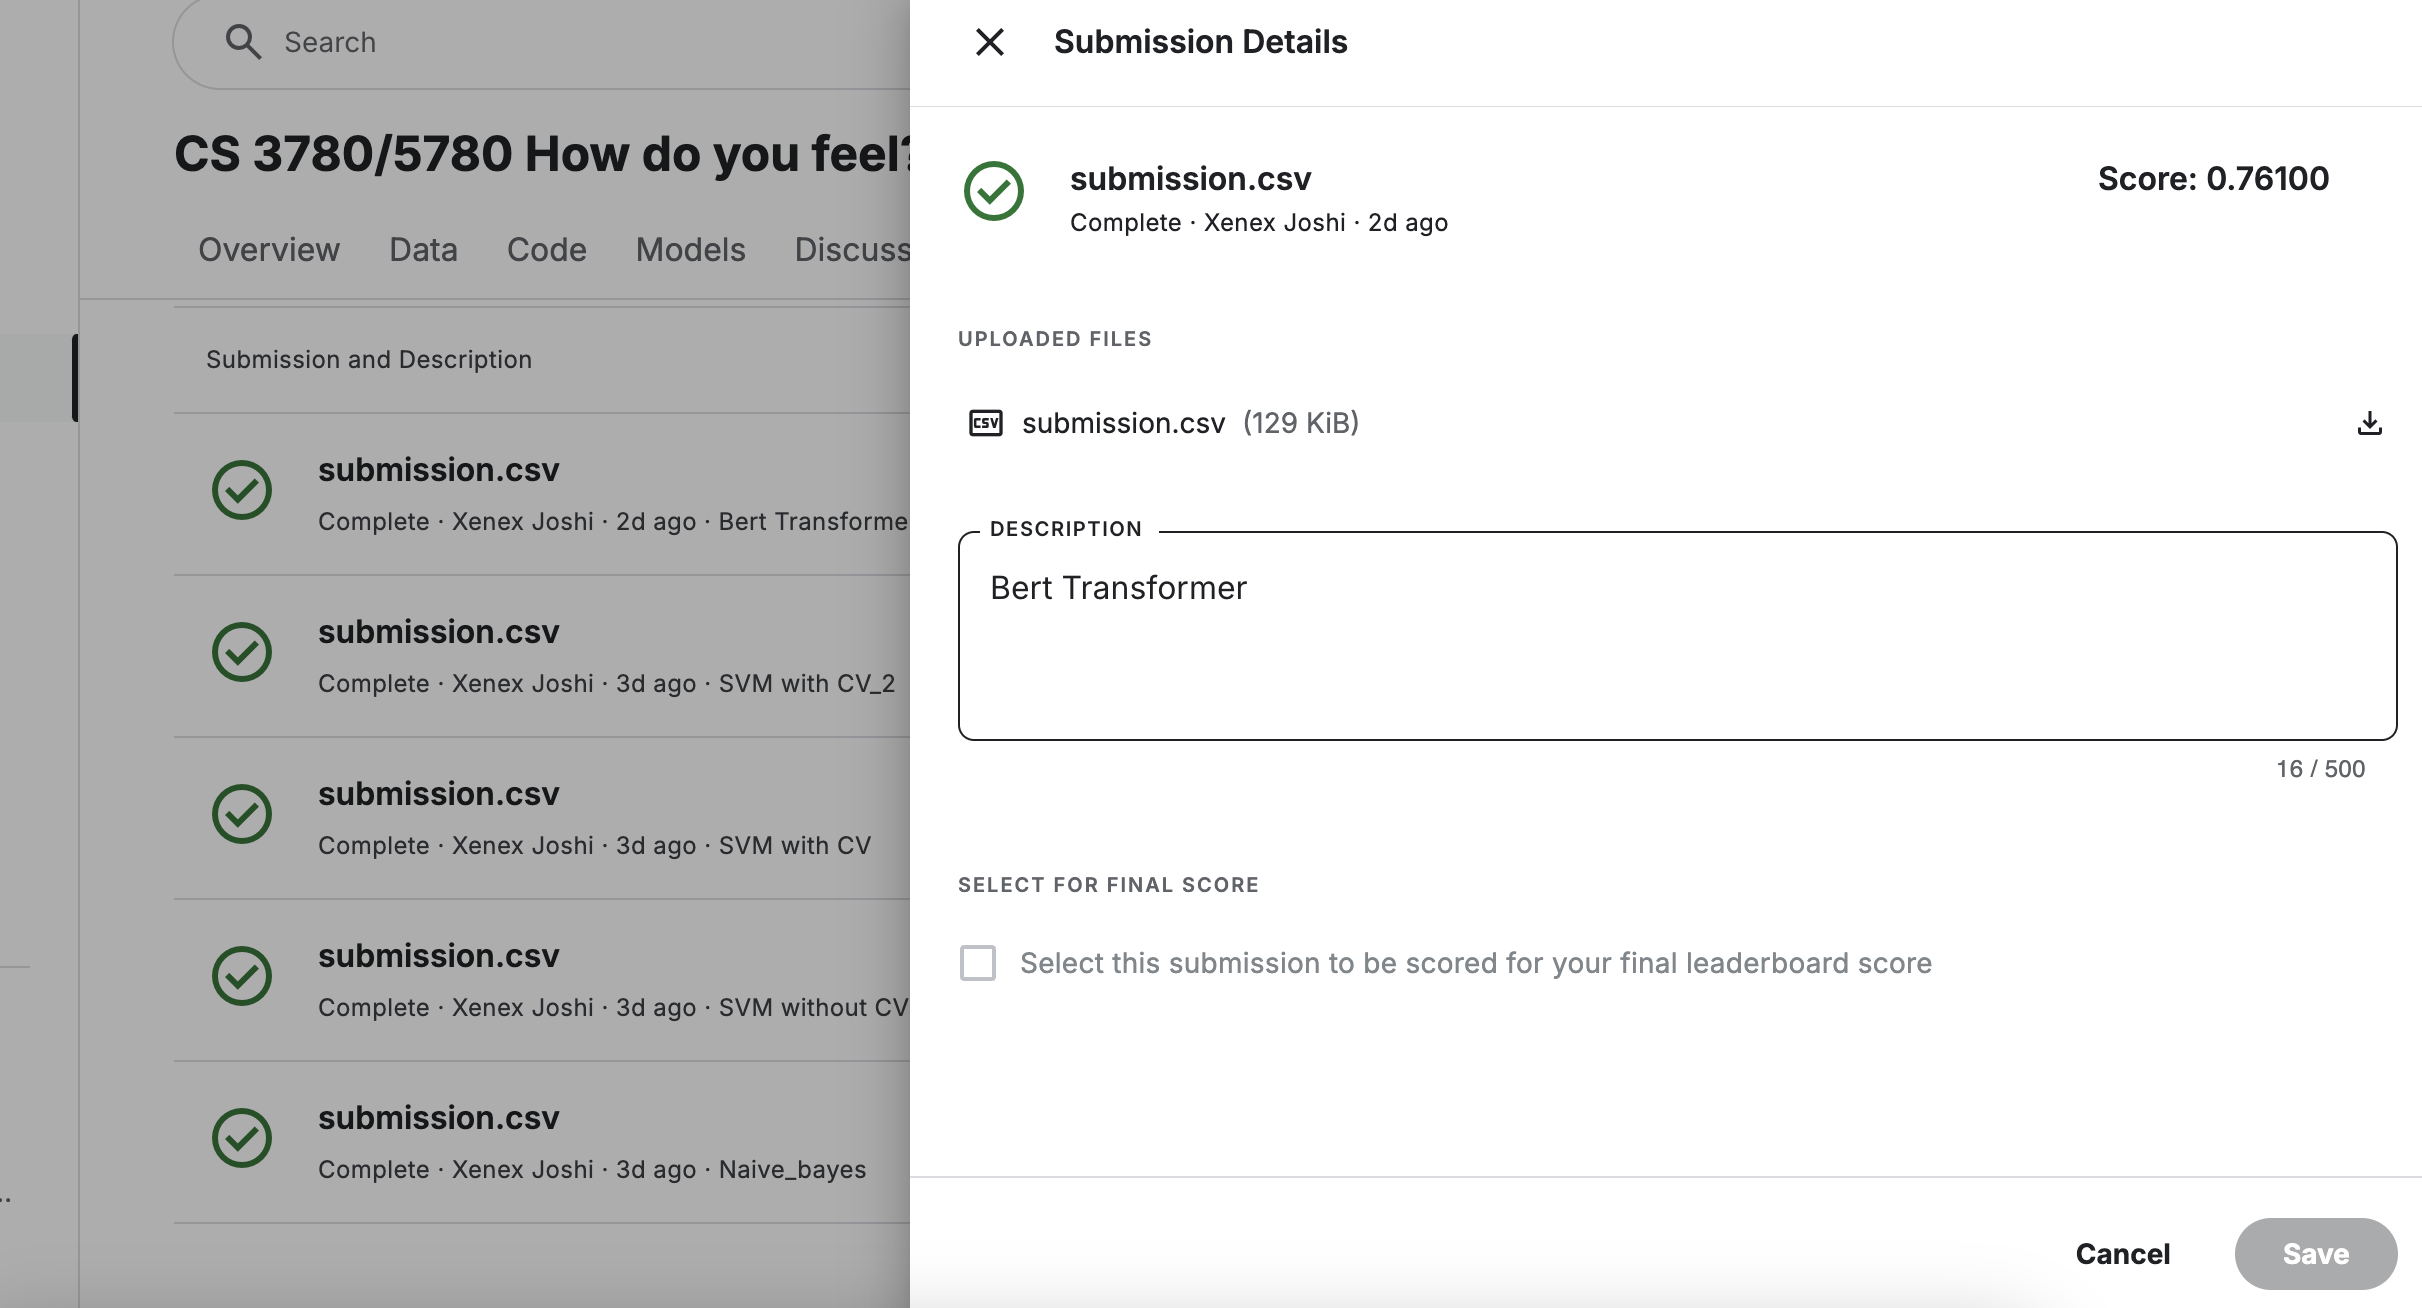

<h2>Part 3: Kaggle Submission</h2><p>
You need to generate a prediction CSV using the following cell from your trained model and submit the direct output of your code to Kaggle. The results should be presented in two columns in csv format: the first column is the data id (0-14999) and the second column includes the predictions for the test set. The first column must be named id and the second column must be named label (otherwise your submission will fail). A sample predication file can be downloaded from Kaggle for each problem. 
We provide how to save a csv file if you are running Notebook on Kaggle.

In [19]:
# Generating prediction on test_text using trained Naive-Bayes model
naive_preds = naive_bayes_model.predict(test_data)

# Generating prediction on test_text using trained GridSearch SVM model
svm_preds = svm_model.predict(test_data)

# Generating prediction on test_text using trained Bert transformer
test_dataset = EmotionDataset(data = test_text, tokenizer = tokenizer, labels = np.array([0] * len(test_text)))
transformer_preds = (trainer.predict(test_dataset)).predictions.argmax(-1)


# Creating submission.csv from selected model prediction
submission = pd.DataFrame({'id': range(15000), 'label': transformer_preds})
submission.to_csv('submission.csv', index=False)

100%|██████████| 235/235 [13:39<00:00,  3.49s/it]
